# Mini Project using the League Of Legends API

This project is aimed at understanding how the API provided by Riot Games for its different games works. Other related APIS will be added.

In [2]:
api_key = 'your_api_key'

In [4]:
api_key

'your_api_key'

In [5]:
api_url = 'https://la1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5'

In [6]:
import requests
import os
import pandas as pd

In [7]:
requests.get(api_url)

<Response [401]>

In [8]:
api_url = api_url + '?api_key=' + api_key

In [9]:
api_url

'https://la1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key=your_api_key'

In [83]:
response = requests.get(api_url)

In [84]:
json_data = response.json()

In [85]:
json_data

{'tier': 'CHALLENGER',
 'leagueId': '9e47028a-50c9-3edd-a3d4-e2bdc642d3fa',
 'queue': 'RANKED_SOLO_5x5',
 'name': "Cassiopeia's Legion",
 'entries': [{'summonerId': 'VryIQjOH6V3NHcUzyDNota3PBVB10rCdYbS3CSQKZm658n0',
   'summonerName': 'Fading Light',
   'leaguePoints': 701,
   'rank': 'I',
   'wins': 171,
   'losses': 147,
   'veteran': False,
   'inactive': False,
   'freshBlood': True,
   'hotStreak': False},
  {'summonerId': 'dEp9zXbsyHvySNNWk7KH0l1b2LQoNwKxjkcwX36kipq0',
   'summonerName': 'Apêx Predator',
   'leaguePoints': 758,
   'rank': 'I',
   'wins': 67,
   'losses': 38,
   'veteran': False,
   'inactive': False,
   'freshBlood': True,
   'hotStreak': True},
  {'summonerId': 'TPPdCEHizvrysFsBER8AJ38RF_EaHecU-Lh_8lCiGE1TlFY',
   'summonerName': 'Excessive',
   'leaguePoints': 885,
   'rank': 'I',
   'wins': 92,
   'losses': 52,
   'veteran': False,
   'inactive': False,
   'freshBlood': False,
   'hotStreak': False},
  {'summonerId': 'BnST6VywcLPXJtlTm-ti7F3d3hxDHCEIyLQtBv03sD

In [86]:
import csv

In [87]:
csv_file_path = os.path.join('C:/Users/Andres/Desktop/CSVs','datos_api_LOL.csv')

In [88]:
if 'entries' in json_data:
    
    entries = json_data['entries']
    
    if entries:
        
        fieldnames = entries[0].keys()
        
        with open(csv_file_path,'w',newline='',encoding='utf-8') as csvfile:
        
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(entries)
    else:
        print('list "entries" is empty.')
else:
    print('key "entries" is not present at API response.')
            

In [89]:
dataset_path = 'C:/Users/Andres/Desktop/CSVs/datos_api_LOL.csv'

In [90]:
df_LOL = pd.read_csv(dataset_path)

In [115]:
column_clean = ['summonerId','rank','veteran','inactive']
df_LOL1 = df_LOL.drop(column_clean,axis=1)

In [147]:
print(df_LOL1.head())

    summonerName  leaguePoints  wins  losses  freshBlood  hotStreak
0   Fading Light           701   171     147        True      False
1  Apêx Predator           758    67      38        True       True
2      Excessive           885    92      52       False      False
3      DrErickMx           772    87      59       False      False
4   Night Feeder           863   158     124       False      False


In [229]:
LP1400 = df_LOL1[df_LOL['leaguePoints']>=1380]
LP1400 = LP1400.sort_values('leaguePoints',ascending=False)
print(LP1400)

         summonerName  leaguePoints  wins  losses  freshBlood  hotStreak
199               z z          1948   190     120       False      False
49           Meguıtan          1938   246     132       False      False
34        Sparkaholic          1762   252     185       False       True
177       DeadIy Mark          1581   226     170       False      False
87   GatitaCaliente69          1531   169     114       False       True
5              lnside          1515   158      89       False      False
125             STEPZ          1405   317     251       False       True
180             Jauny          1400    98      61       False      False
47               kiss          1391   320     265       False      False
113             Sylas          1387   102      56       False      False


In [230]:
LP1400['totalGames'] = LP1400['wins'] + LP1400['losses']
LP1400

,summonerName,leaguePoints,wins,losses,freshBlood,hotStreak,totalGames
199,z z,1948,190,120,False,False,310
49,Meguıtan,1938,246,132,False,False,378
34,Sparkaholic,1762,252,185,False,True,437
177,DeadIy Mark,1581,226,170,False,False,396
87,GatitaCaliente69,1531,169,114,False,True,283
5,lnside,1515,158,89,False,False,247
125,STEPZ,1405,317,251,False,True,568
180,Jauny,1400,98,61,False,False,159
47,kiss,1391,320,265,False,False,585
113,Sylas,1387,102,56,False,False,158


In [231]:
LP1400['Winrate'] = (LP1400['wins'] / LP1400['totalGames']) * 100
LP1400['Winrate'] = LP1400['Winrate'].round(1)
LP1400

,summonerName,leaguePoints,wins,losses,freshBlood,hotStreak,totalGames,Winrate
199,z z,1948,190,120,False,False,310,61.3
49,Meguıtan,1938,246,132,False,False,378,65.1
34,Sparkaholic,1762,252,185,False,True,437,57.7
177,DeadIy Mark,1581,226,170,False,False,396,57.1
87,GatitaCaliente69,1531,169,114,False,True,283,59.7
5,lnside,1515,158,89,False,False,247,64.0
125,STEPZ,1405,317,251,False,True,568,55.8
180,Jauny,1400,98,61,False,False,159,61.6
47,kiss,1391,320,265,False,False,585,54.7
113,Sylas,1387,102,56,False,False,158,64.6


In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

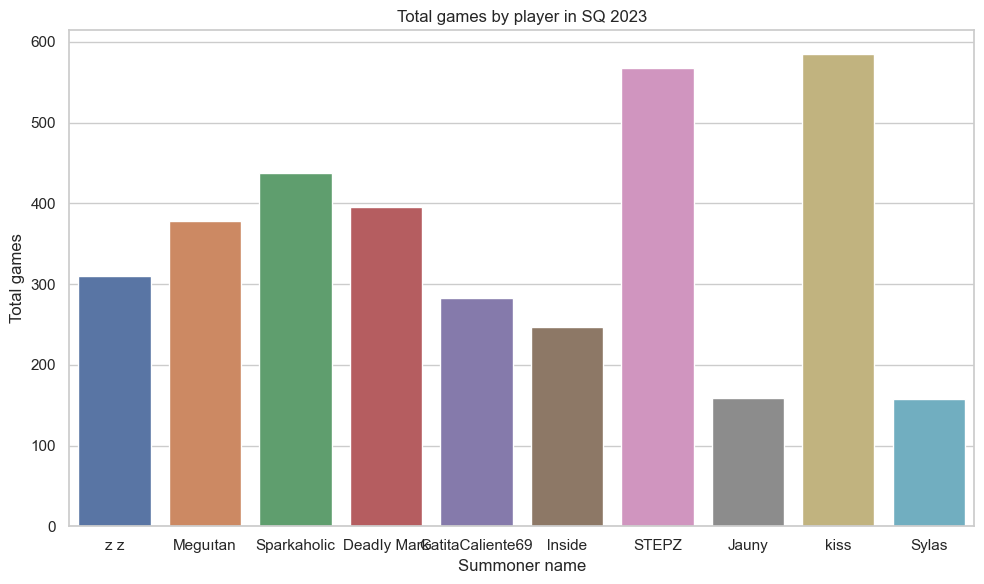

In [233]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(data=LP1400, x='summonerName', y='totalGames')

plt.ylabel('Total games')
plt.xlabel('Summoner name')
plt.title('Total games by player in SQ 2023')

plt.tight_layout()

plt.show()

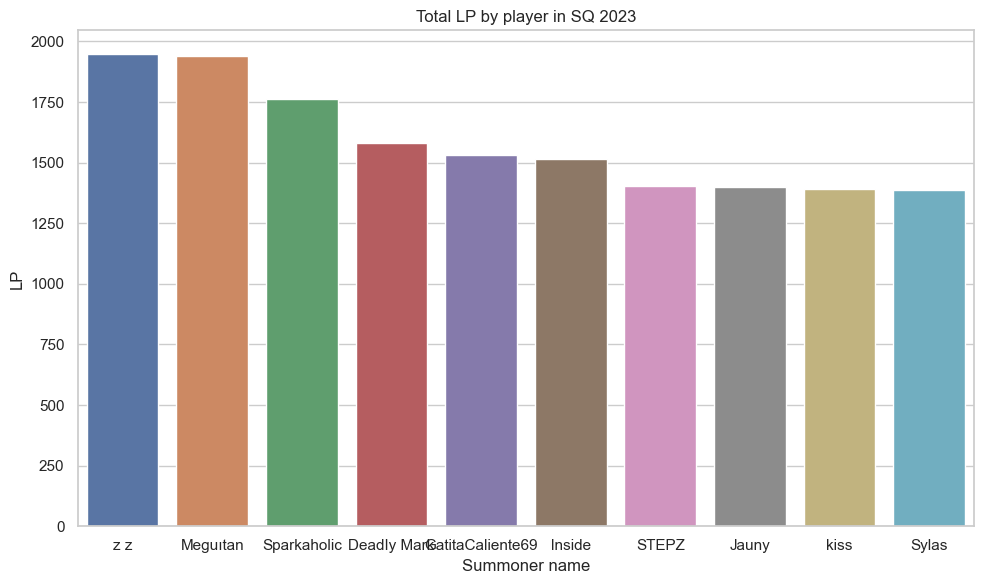

In [234]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(data=LP1400, x='summonerName', y='leaguePoints')

plt.ylabel('LP')
plt.xlabel('Summoner name')
plt.title('Total LP by player in SQ 2023')

plt.tight_layout()

plt.show()

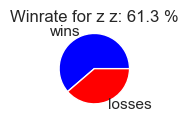

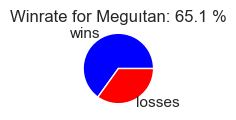

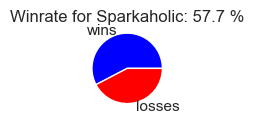

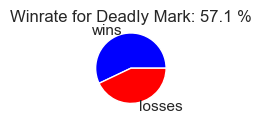

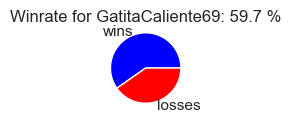

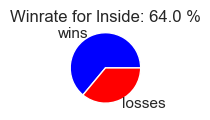

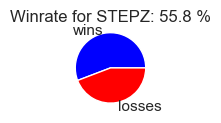

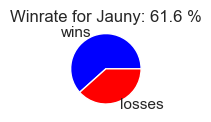

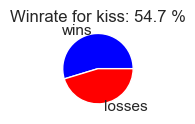

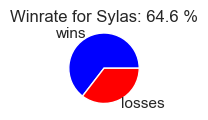

In [235]:
for index, row in LP1400.iterrows():

    plt.figure(figsize=(1, 1))
    sizes = [row['wins'], row['losses']]
    labels = ['wins','losses']
    colors = ['blue','red']
    
    plt.pie(sizes, labels=labels, colors=colors)
    plt.axis('equal')
    
    plt.title(f"Winrate for {row['summonerName']}: {row['Winrate']} %")
    
    plt.show()